In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.compose import ColumnTransformer

In [2]:
ds = pd.read_csv('Fertilizer Recommendation.csv')
ds

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


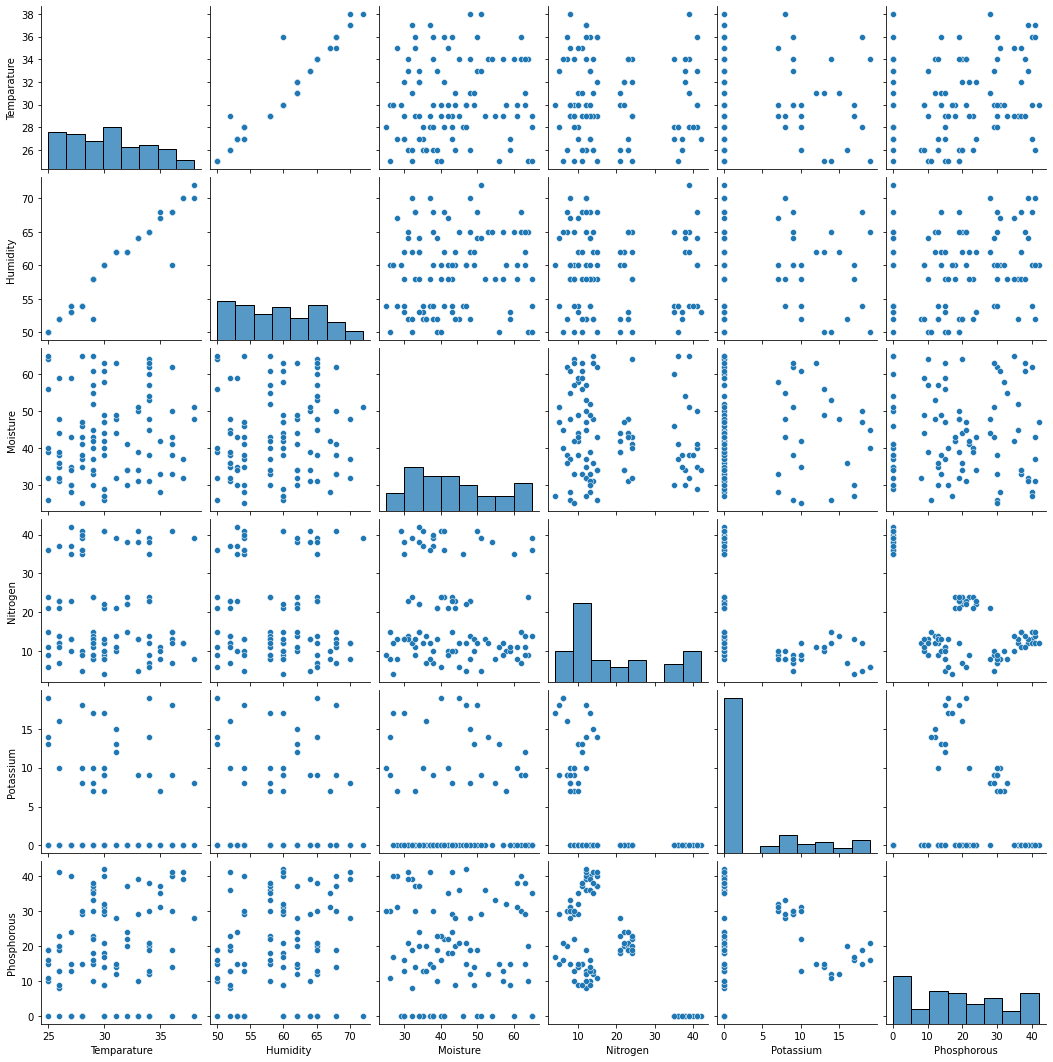

In [3]:
sns.pairplot(ds)

In [4]:
ds.drop('Crop Type', axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['Soil Type'] = le.fit_transform(ds['Soil Type'])

In [6]:
x = ds.iloc[:,:-1]
y = ds['Fertilizer Name']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
x['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [9]:
from sklearn.feature_selection import SelectKBest, chi2
skf = SelectKBest(k=3, score_func=chi2)

In [10]:
skf.fit(x, y)

SelectKBest(k=3, score_func=<function chi2 at 0x0000021926D891F0>)

In [11]:
skf.get_support()

array([False, False, False, False,  True,  True,  True])

In [12]:
x_new = x.iloc[:,skf.get_support()]

In [13]:
x_new

,Nitrogen,Potassium,Phosphorous
0,37,0,0
1,12,0,36
2,7,9,30
3,22,0,20
4,35,0,0
...,...,...,...
94,24,0,19
95,4,17,17
96,39,0,0
97,15,0,41


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


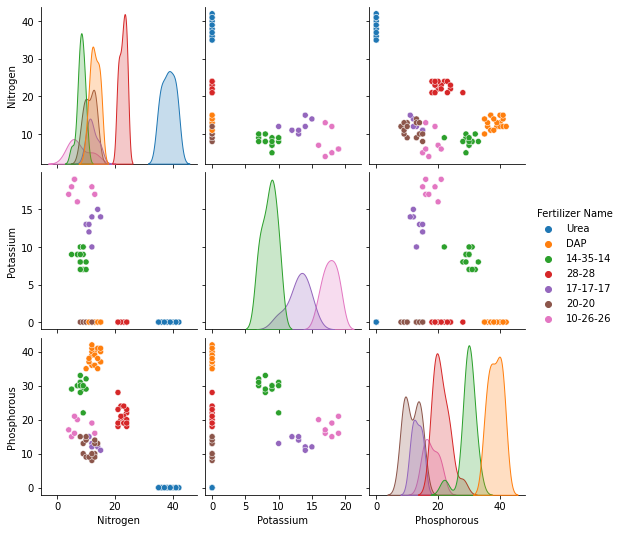

In [36]:
fig = pd.concat([x_new, ds['Fertilizer Name']], axis=1)
sns.pairplot(fig, hue='Fertilizer Name')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, shuffle=True, random_state=42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes for fertilizer_name
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/200
3/3 [==============================] - 2s 211ms/step - loss: 4.1900 - accuracy: 0.2174 - val_loss: 3.7941 - val_accuracy: 0.2000
Epoch 2/200
3/3 [==============================] - 0s 46ms/step - loss: 3.3047 - accuracy: 0.2174 - val_loss: 2.8112 - val_accuracy: 0.2333
Epoch 3/200
3/3 [==============================] - 0s 30ms/step - loss: 2.5760 - accuracy: 0.2464 - val_loss: 1.9940 - val_accuracy: 0.2667
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 1.9384 - accuracy: 0.3478 - val_loss: 1.3793 - val_accuracy: 0.5333
Epoch 5/200
3/3 [==============================] - 0s 39ms/step - loss: 1.5072 - accuracy: 0.5652 - val_loss: 0.9770 - val_accuracy: 0.6000
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 1.2485 - accuracy: 0.6667 - val_loss: 0.7642 - val_accuracy: 0.8667
Epoch 7/200
3/3 [==============================] - 0s 30ms/step - loss: 1.1059 - accuracy: 0.7391 - val_loss: 0.6659 - val_accuracy: 0.8667
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 36ms/step - loss: 0.2817 - accuracy: 0.8986 - val_loss: 0.2016 - val_accuracy: 0.9333
Epoch 60/200
3/3 [==============================] - 0s 48ms/step - loss: 0.2788 - accuracy: 0.8696 - val_loss: 0.1766 - val_accuracy: 0.9667
Epoch 61/200
3/3 [==============================] - 0s 34ms/step - loss: 0.2837 - accuracy: 0.8696 - val_loss: 0.1648 - val_accuracy: 0.9667
Epoch 62/200
3/3 [==============================] - 0s 40ms/step - loss: 0.2874 - accuracy: 0.8551 - val_loss: 0.1670 - val_accuracy: 0.9667
Epoch 63/200
3/3 [==============================] - 0s 32ms/step - loss: 0.2809 - accuracy: 0.8696 - val_loss: 0.1772 - val_accuracy: 0.9667
Epoch 64/200
3/3 [==============================] - 0s 29ms/step - loss: 0.2719 - accuracy: 0.8841 - val_loss: 0.1827 - val_accuracy: 0.9333
Epoch 65/200
3/3 [==============================] - 0s 33ms/step - loss: 0.2699 - accuracy: 0.8841 - val_loss: 0.1935 - val_accuracy: 0.9333
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 33ms/step - loss: 0.2035 - accuracy: 0.8841 - val_loss: 0.1621 - val_accuracy: 0.9333
Epoch 118/200
3/3 [==============================] - 0s 36ms/step - loss: 0.1924 - accuracy: 0.9710 - val_loss: 0.2356 - val_accuracy: 0.8667
Epoch 119/200
3/3 [==============================] - 0s 37ms/step - loss: 0.2040 - accuracy: 0.9710 - val_loss: 0.2584 - val_accuracy: 0.8667
Epoch 120/200
3/3 [==============================] - 0s 33ms/step - loss: 0.2067 - accuracy: 0.9710 - val_loss: 0.2142 - val_accuracy: 0.9000
Epoch 121/200
3/3 [==============================] - 0s 42ms/step - loss: 0.1864 - accuracy: 0.9855 - val_loss: 0.1613 - val_accuracy: 0.9667
Epoch 122/200
3/3 [==============================] - 0s 34ms/step - loss: 0.1763 - accuracy: 0.9420 - val_loss: 0.1379 - val_accuracy: 0.9667
Epoch 123/200
3/3 [==============================] - 0s 33ms/step - loss: 0.1761 - accuracy: 0.9275 - val_loss: 0.1411 - val_accuracy: 0.9667
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 36ms/step - loss: 0.1310 - accuracy: 0.9855 - val_loss: 0.1275 - val_accuracy: 0.9667
Epoch 176/200
3/3 [==============================] - 0s 36ms/step - loss: 0.1324 - accuracy: 0.9710 - val_loss: 0.1270 - val_accuracy: 0.9667
Epoch 177/200
3/3 [==============================] - 0s 36ms/step - loss: 0.1310 - accuracy: 0.9710 - val_loss: 0.1349 - val_accuracy: 0.9667
Epoch 178/200
3/3 [==============================] - 0s 35ms/step - loss: 0.1303 - accuracy: 0.9855 - val_loss: 0.1297 - val_accuracy: 0.9667
Epoch 179/200
3/3 [==============================] - 0s 37ms/step - loss: 0.1301 - accuracy: 0.9710 - val_loss: 0.1326 - val_accuracy: 0.9667
Epoch 180/200
3/3 [==============================] - 0s 33ms/step - loss: 0.1263 - accuracy: 0.9855 - val_loss: 0.1814 - val_accuracy: 0.9000
Epoch 181/200
3/3 [==============================] - 0s 37ms/step - loss: 0.1503 - accuracy: 0.9855 - val_loss: 0.1825 - val_accuracy: 0.9000
Epoch 

In [16]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.1593 - accuracy: 0.9333


[0.1593479961156845, 0.9333333373069763]

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 56ms/step - loss: 0.1593 - accuracy: 0.9333
Test Loss: 0.1593479961156845, Test Accuracy: 0.9333333373069763


In [39]:
pred = model.predict([[12,0,10]])
for i in range(0,7):
    pred[0][i] = np.round(pred[0][i], 2)
pred

1/1 [==============================] - 0s 127ms/step


array([[0.  , 0.  , 0.  , 0.64, 0.35, 0.  , 0.  ]], dtype=float32)

In [40]:
le.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [41]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open('fertilizer.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpnor6d4w_\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpnor6d4w_\assets


12360

In [42]:

# Save the model as a SavedModel
model.save("fertilizer_model")

# Convert the SavedModel to TFLite format
converter = tf.lite.TFLiteConverter.from_saved_model("fertilizer_model")
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("fertilizer_model_.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: fertilizer_model\assets


INFO:tensorflow:Assets written to: fertilizer_model\assets


In [43]:
model.save('fert')

INFO:tensorflow:Assets written to: fert\assets


INFO:tensorflow:Assets written to: fert\assets
